# iCLotus Store Simulation

At iCLotus Store, we have the highest number of customer complaints in decade. Based on the exploratory data analytics, we have found that most of the complaints came from the long wait line at the cashier. Based on this data, we estimated that if a customer waits over 10 minutes at the line, the customer develops the dissatisfaction. This dissatisfaction costs the store overall about 10฿. If they open a cashier line, it cost 100฿ per hour. Note that, all cashier lines open from the first customer to the last customer. 

The question is how many cashier lines should we open to minimize the operation costs vs the customer dissatisfaction costs.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

For this simulation, we assume that there are 100000 customers at the store. We want to test simulate the costs of operation and the cost of customer dissatisfaction for these customers based on the number of open lines. Note that, iCLotus has the maximum of 20 cashier lines. 

In [10]:
n = 100000
lineCosts = 200
counters = 20
maxWT = 10
wtCost = 10
totalLC = np.zeros(counters)


Assuming that the customers enter the cashier line one after another at random time according to the Gamma distribution. Specifically, the next customer will enter the lines with the Gamma distribution with the mean of 0.5 minute. Then, the customer chooses a line at random (uniform distribution). In addition, the service times of each customer is also generated at random according to the Gamma distribution. We set the mean of the service time at around 3.5 minutes. 

If there is no customer ahead of the current customer at the line, the customer can be serviced right away. The maximum operation duration of a line is the operation time of all the lines.


In [11]:
for i in range(1, counters+1):
  maxlinedur = list()
  countersCus = list()
  counterCost = np.zeros(i)
  maxD = np.zeros(i)
  countersCus = list()  
  for j in range(i):
    countersCus.append(list())

  cc = np.random.choice(range(1,i+1), size=n, replace=True)
  iatimes = np.random.gamma(0.2517,scale=1.854,size=n-1)
  sertimes = np.random.gamma(6.917,scale=0.492,size=n)
  arrtimes = np.cumsum(iatimes)
  arrtimes = np.insert(arrtimes,0,0)
  arrivaltimeat = list()
  servicetimeat = list()
  
  for j in range(i):
    arrivaltimeat.append(list())
    servicetimeat.append(list())

  for j in range(n):
    countersCus[cc[j]-1].append(j)
    arrivaltimeat[cc[j]-1].append(arrtimes[j])
    servicetimeat[cc[j]-1].append(sertimes[j])
  
  #print('Round: {} cc size {}'.format(i, len(cc)))
  cost = 0
  for k in range(i):
    T = np.zeros(len(countersCus[k]))# service start time
    D = np.zeros(len(countersCus[k]))# duration time
    W = np.zeros(len(countersCus[k]))# wait time

    T[0] = arrivaltimeat[k][0]
    D[0] = T[0] + servicetimeat[k][0]
    W[0] = 0

    for t in range(1,len(countersCus[k])):
      T[t] = max(D[t-1], arrivaltimeat[k][t])
      D[t] = T[t] + servicetimeat[k][t]
      W[t] = T[t] - arrivaltimeat[k][t]
      if W[t] > maxWT:
        counterCost[i-1] = counterCost[i-1] + 1
    #print('AT {}'.format(max(arrivaltimeat[k])))
    #print('ST {}'.format(np.mean(servicetimeat[k])))
    #print(T)
    #print(D)
    #print(max(W))
    maxD[k] = max(D)
  #print('Round: {} has {} customers.'.format(i, counterCost[i-1]))
  #print(max(maxD),counterCost[i-1])  
  totalLC[i-1] = wtCost*counterCost[i-1] + (i*lineCosts*max(maxD)/(60))

Text(0.5, 1.0, 'The simulation result for the decision on the number of cashier lines.')

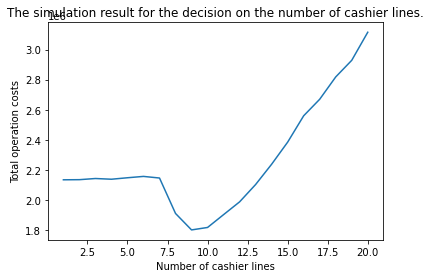

In [12]:
plt.plot(range(1,counters+1), totalLC)
plt.xlabel('Number of cashier lines')
plt.ylabel('Total operation costs')
plt.title('The simulation result for the decision on the number of cashier lines.')

# Decision Decision Decision

Based on this result, the optimal number of cashier lines is 11. 

Ex1: Can you convert the code above into function, so that we can give the Gamma distributions, the parameters: {n, lineCosts, counters, maxWT, wtCost} and that it will return the optimal number of lines.



Ex2: If we change the Gamma Distribution, its shape and scale, for both the arrival time and the survice time, what happen? Can you explain the results?

Ex3: What are the correlation among the parameters, {n, lineCosts, counters, maxWT, wtCost}, to the optimal value?

(array([3.4510e+03, 2.4998e+04, 3.4911e+04, 2.2729e+04, 9.6950e+03,
        3.1470e+03, 8.2900e+02, 1.9600e+02, 3.7000e+01, 7.0000e+00]),
 array([ 0.33993023,  1.45847961,  2.57702899,  3.69557838,  4.81412776,
         5.93267714,  7.05122652,  8.1697759 ,  9.28832529, 10.40687467,
        11.52542405]),
 <a list of 10 Patch objects>)

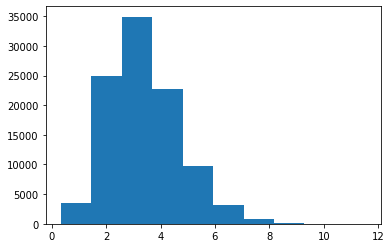

In [5]:
sertimes = np.random.gamma(6.917,scale=0.492,size=n)
plt.hist(sertimes)